# MMDM. Problem 2. Belov Alexander

$$
J(u) = \int_{0}^{1} \int_{0}^{1} L \, dx \, dy = \int_{0}^{1} \int_{0}^{1} (u_x)^2 + (u_y)^2 - 4 \pi^2 \sin(\pi x) \sin(\pi y) u \, dx \, dy\rightarrow \min_u
$$

Assume $u(x,y) = h(x)g(y)$. Fix $g$. Then:

$$
J(h) = \int_{0}^{1} \left[ h_x^2(x)\left(\int g^2 dy \right) + h^2(x) \left(\int g_y^2 dy \right) + h(x) \sin(\pi x ) \left( \int -4\pi^2 \sin(\pi y) g(y) dy \right) \right] \, dx
$$
Introduce constants $c_1, c_2, c_3$ for convenience:
$$
J(h) = \int_{0}^{1} \left[ h_x^2(x) \cdot c_1 + h^2(x) \cdot c_2 + h(x) \sin(\pi x ) \cdot c_3 \right] \, dx
$$
Euler-Lagrange equation for $h$:
$$
\frac{\partial L}{\partial h} - \frac{d}{dx} \frac{\partial L}{\partial h_x} = 2 c_2 h + c_3 \sin(\pi x) - 2 c_1 h_{xx} = 0
$$

Substitute $c$'s and simplify to get BVP for $h$:
$$
h_{xx} \left(\int g^2 \, dy\right) - h \left(\int g_y^2 dy\right) + \int_{0}^{1} 2 \pi^2 \sin(\pi x) \sin(\pi y) g(y) \, dy = 0 \\
h(0) = h(1) = 0
$$

BVP for $g$:
$$
g_{yy} \left(\int h^2 \, dx\right) - g \left(\int h_x^2 dx\right) + \int_{0}^{1} 2 \pi^2 \sin(\pi x) \sin(\pi y) h(x) \, dx = 0 \\
 g(0) = g(1) = 0

$$

Rewrite in standard form:
\begin{align*}
g_1'(y) &= g_2(y) \\
g_2'(y) &= \frac{1} {\left(\int h^2 \, dx\right)} \left( g_1(y) \cdot \left(\int h_x^2 dx\right) - \int_{0}^{1} 2 \pi^2 \sin(\pi x) \sin(\pi y) h(x) \, dx \right) \\
 g(0) &= g(1) = 0
\end{align*}

$$

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, pi, sin
from scipy.integrate import solve_ivp, trapezoid

In [6]:
def shooting_g(
    odefunc, # фукнция, задающая уравнение Эйлера-Лагранжа для J(g)
    h, # текущая оценка h на сетке x
    hx, # текущая оценка hx на сетке x
    x, # сетка x
    y, # сетка y
    max_step, # макс шаг солвера
    tol, # точность; когда правый конец траектории попал в ноль (краевое условие) с такой точностью, расчет завершается
    eps, # eps для разностной производной в методе Ньютона
    max_shots, # макс число итераций
    s, # начальный "угол" стрельбы
):
    it = 0
    while True:
        sol = solve_ivp(
            fun=lambda t, _g: odefunc(t, _g, h, hx, x, y),
            t_span=[0, 1],
            y0=[0, s],
            max_step=max_step,
            t_eval=y,
        )
        g = sol.y[0,:]
        gy = sol.y[1,:]

        sol_tol = np.abs(sol.y[0,-1])
        if sol_tol < tol:
            print(f'achieved tol. {sol_tol=:.2E} {it=}')
            return g, gy

        it += 1
        if it == max_shots:
            print(f'max shots reachd. {sol_tol=:.2E} {it=}')
            return g, gy
        
        sol_eps = solve_ivp(
            fun=lambda t, _g: odefunc(t, _g, h, hx, x, y),
            t_span=[0, 1],
            y0=[0, s+eps],
            max_step=max_step,
            t_eval=y,
        )
        F = (sol_eps.y[0,-1] - sol.y[0,-1]) / eps
        s = s - sol.y[0,-1] / F

In [7]:
def odefunc(t, g, h, hx, x, y):
    k0 = trapezoid(h**2, x)
    k1 = trapezoid(hx**2, x)
    k2 = trapezoid(2 * pi**2 * sin(pi*x) * sin(pi*y) * h, x)
    return [
        g[1],
        1/k0 * (g[0] * k1 - k2) 
    ]

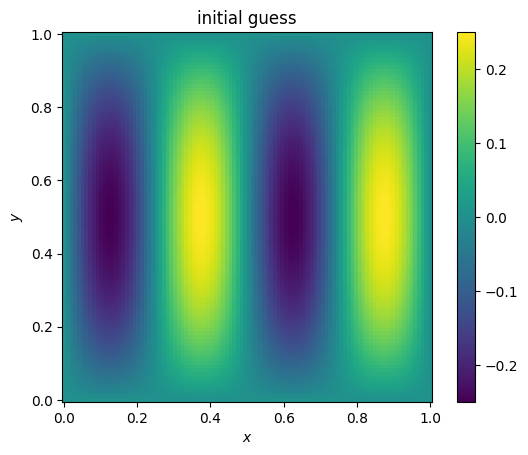

it=0
g
achieved tol. sol_tol=5.41E-06 it=1
h
achieved tol. sol_tol=1.10E-08 it=3


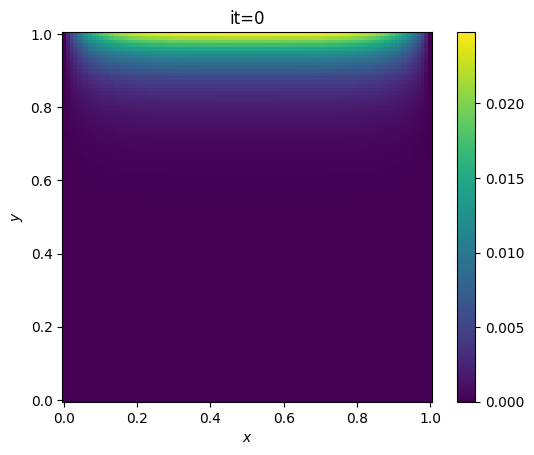

it=1
g
achieved tol. sol_tol=2.80E-12 it=1
h
achieved tol. sol_tol=2.23E-07 it=2


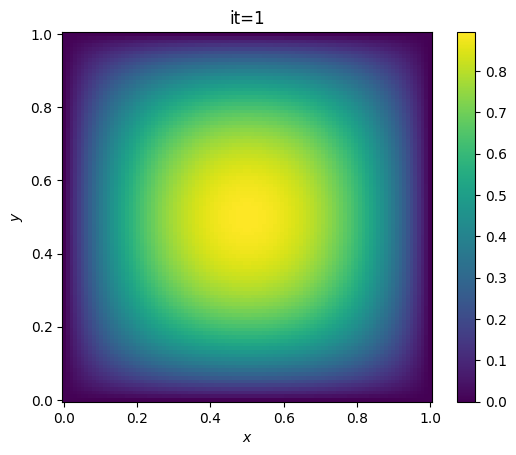

it=2
g
achieved tol. sol_tol=1.11E-14 it=1
h
achieved tol. sol_tol=3.58E-08 it=2


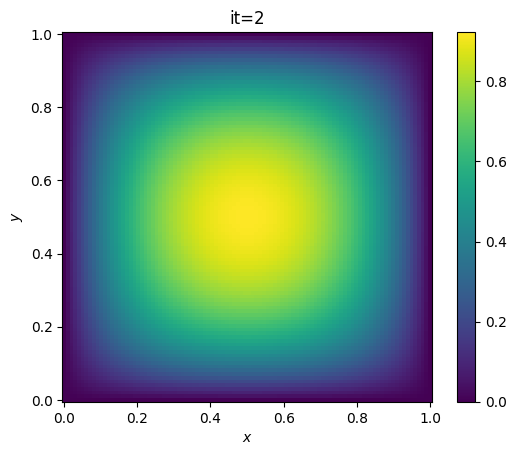

it=3
g
achieved tol. sol_tol=1.71E-12 it=1
h
achieved tol. sol_tol=2.87E-07 it=2


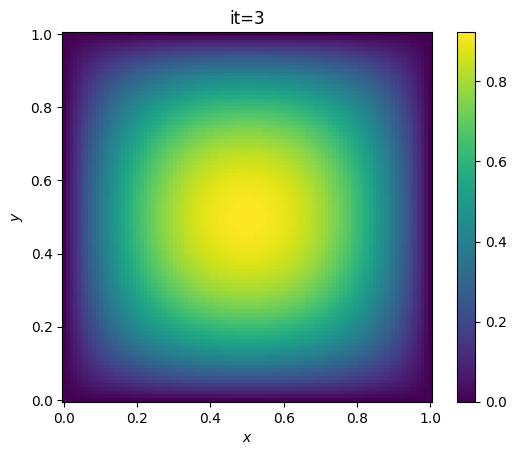

it=4
g
achieved tol. sol_tol=8.31E-13 it=1
h
achieved tol. sol_tol=3.88E-09 it=2


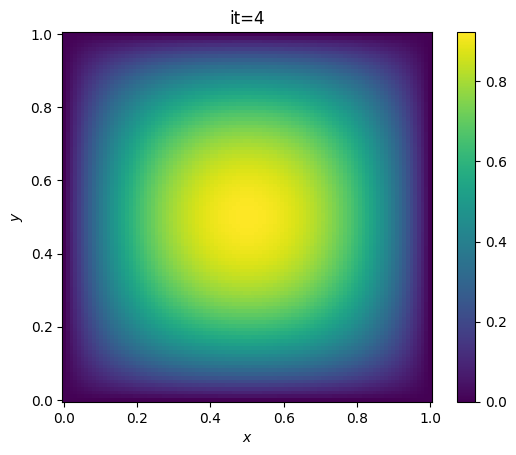

it=5
g
achieved tol. sol_tol=3.85E-12 it=1
h
achieved tol. sol_tol=1.25E-07 it=2


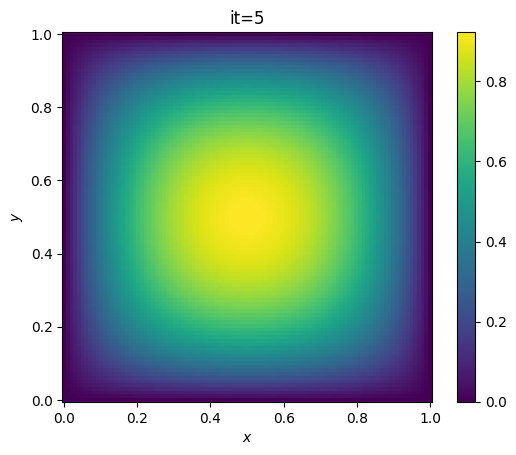

it=6
g
achieved tol. sol_tol=4.25E-13 it=1
h
achieved tol. sol_tol=1.09E-07 it=2


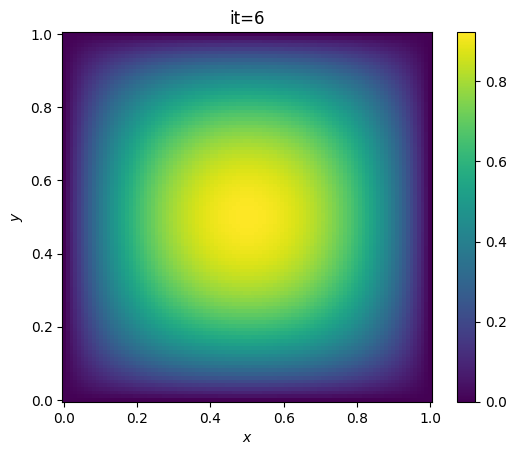

it=7
g
achieved tol. sol_tol=8.64E-14 it=1
h
achieved tol. sol_tol=6.47E-07 it=2


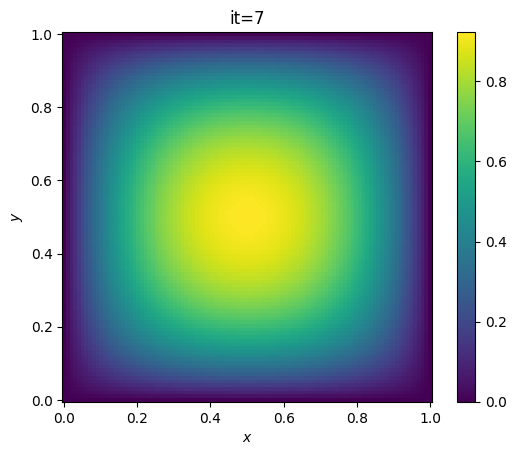

it=8
g
achieved tol. sol_tol=4.15E-12 it=1
h
achieved tol. sol_tol=8.22E-08 it=2


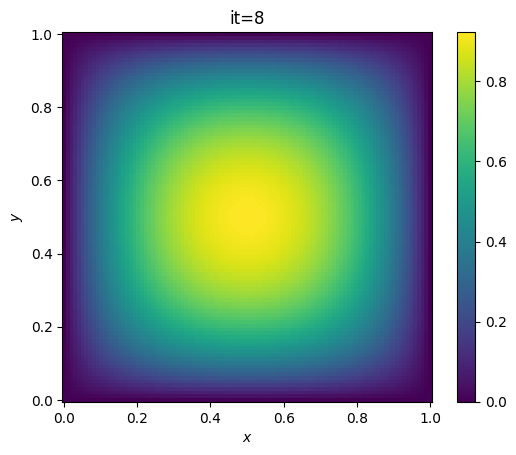

it=9
g
achieved tol. sol_tol=9.04E-13 it=1
h
achieved tol. sol_tol=1.92E-07 it=2


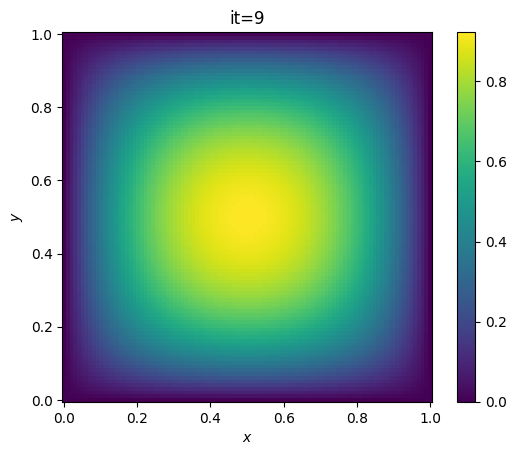

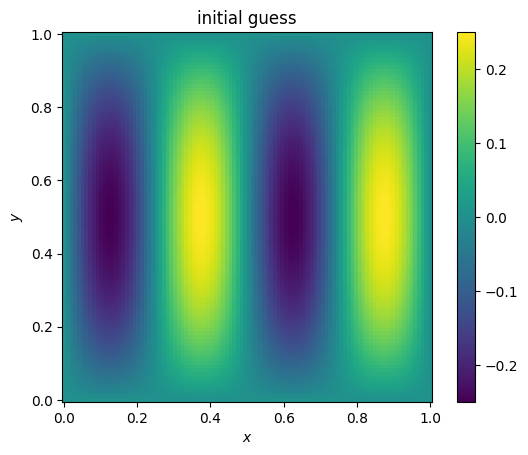

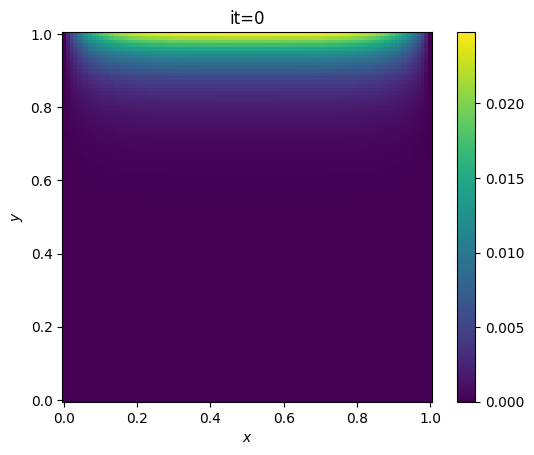

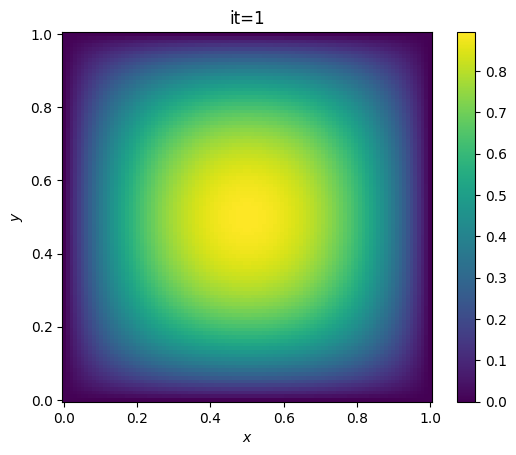

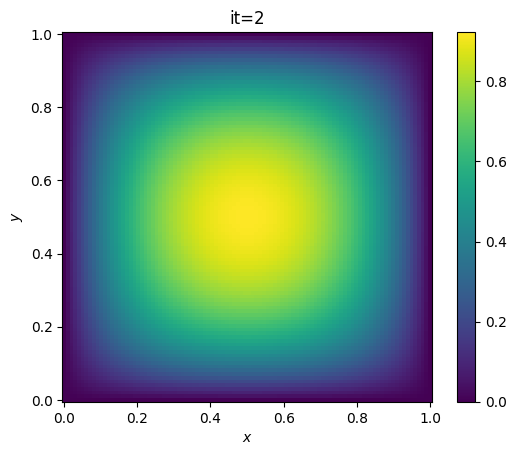

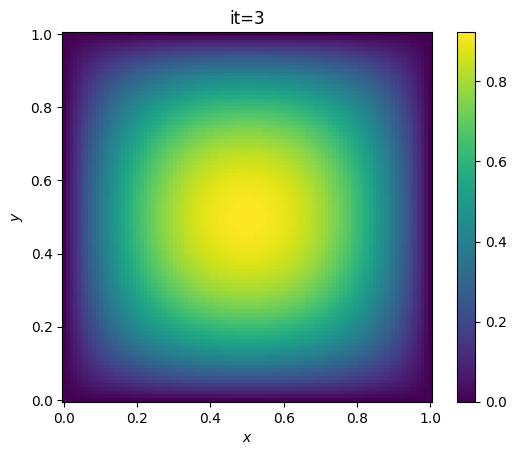

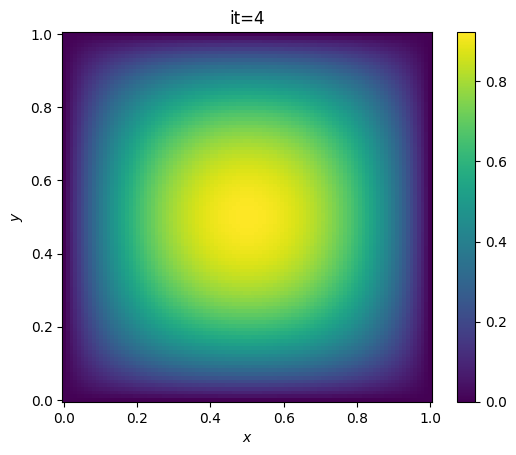

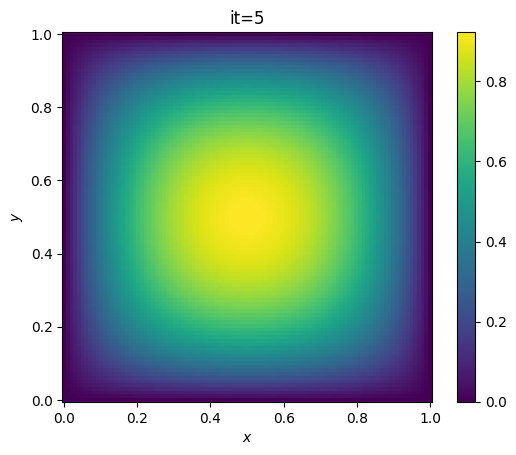

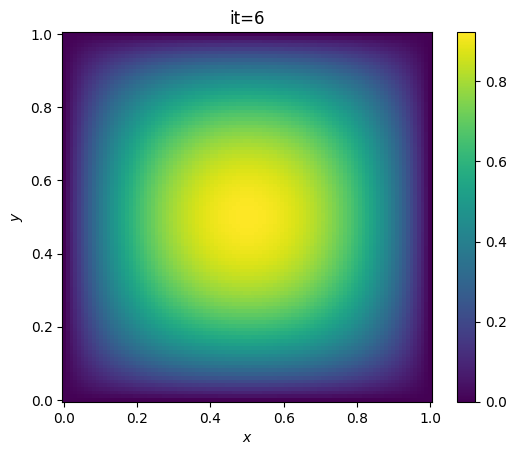

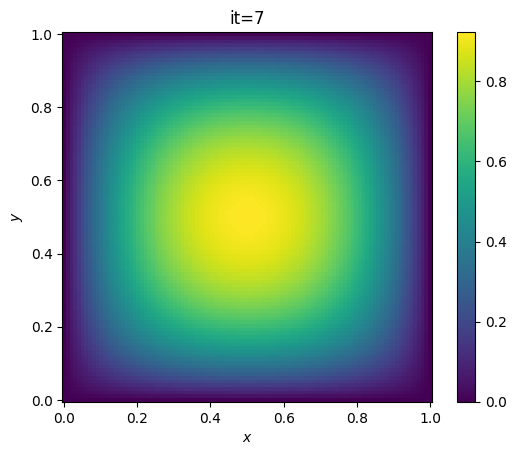

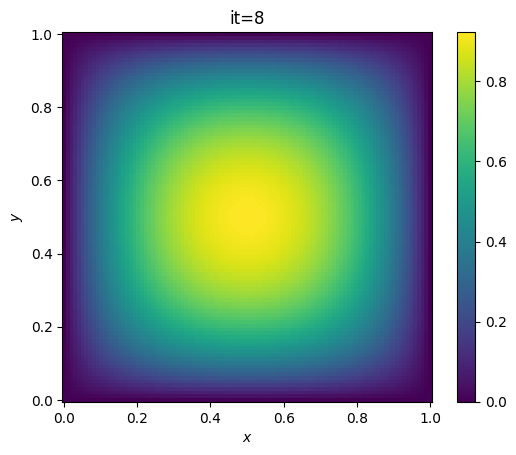

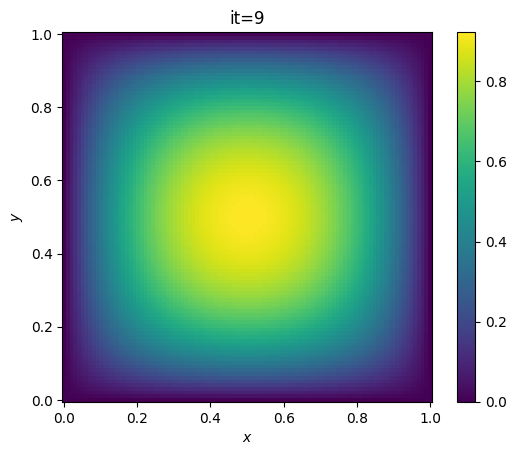

In [8]:
eps = 1e-5 # eps для разностной производной в методе Ньютона
s = 0.1 # начальный "угол" стрельбы
iters = 10 # число итераций IGKM
max_step = 0.01 # макс шаг солвера в пристрелке
tol = 1e-5 # точность в пристрелке; когда правый конец траектории попал в ноль (краевое условие) с такой точностью, расчет завершается
n = 100 # число точек сетки
maxiters_shooting = 100 # макс число итераций метода пристрелки


y = np.linspace(0, 1, n)
g = y**2 - y
gy = 2*y - 1

x = np.linspace(0, 1, n)
h = sin(4*pi*x)
hx = 4*pi*cos(4*pi*x)

X, Y = np.meshgrid(x, y)


def plot(X, Y, h, g, title):
    u = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            u[i, j] = h[j]*g[i]

    fig, ax = plt.subplots();
    ax.set_box_aspect(1);
    pcm = ax.pcolormesh(X, Y, u);
    ax.set_xlabel('$x$');
    ax.set_ylabel('$y$');
    ax.set_title(title);
    fig.colorbar(pcm)
    display(fig);
    

plot(X, Y, h, g, title='initial guess');

for it in range(10):
    print(f'{it=}')
    
    print('g')
    _g, _gy = shooting_g(odefunc,h,hx,x,y,max_step,tol,eps,max_shots=maxiters_shooting,s=s)
    g, gy = _g, _gy

    print('h')
    _h, _hx = shooting_g(odefunc,g,gy,y,x,max_step,tol,eps,max_shots=maxiters_shooting,s=s)
    h, hx = _h, _hx

    plot(X, Y, h, g, title=f'{it=}');